# 3.5 Classifying newswires: a multiclass classification example

This notebook explores the process of classifying newswires into different categories using a deep learning approach.

## The Reuters dataset

The Reuters dataset is a collection of short newswires and their topics, published by Reuters in 1986. It's a widely used benchmark for text classification. It consists of 46 different topics.

## 1. Preparing the data

Before we can train a neural network, we need to prepare the data. This involves:

*   Loading the dataset.
*   Vectorizing the data (converting text to numerical representations).
*   Splitting the data into training, validation, and test sets.

In [ ]:
from tensorflow.keras.datasets import reuters
from tensorflow.keras.utils import to_categorical
import numpy as np

# Load the dataset
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

# Vectorize the data
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# Vectorize the labels
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

print(f"Training data shape: {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Test labels shape: {y_test.shape}")

Training data shape: (8982, 10000)
Training labels shape: (8982, 46)
Test data shape: (2246, 10000)
Test labels shape: (2246, 46)


## 2. Building your network

We will build a neural network model using Keras. For multiclass classification, a common approach is to use a stack of Dense layers with ReLU activation and a final Dense layer with Softmax activation.

The Softmax activation function outputs a probability distribution over the 46 classes, meaning the sum of the outputs will be 1.

The architecture of the model will look like this:

Input Layer (10000 features)
↓
Dense Layer (e.g., 64 units, ReLU activation)
↓
Dense Layer (e.g., 64 units, ReLU activation)
↓
Output Layer (46 units, Softmax activation)

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │       640,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 46)             │         2,990 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 647,214 (2.47 MB)

 Trainable params: 647,214 (2.47 MB)

 Non-trainable params: 0 (0.00 B)

## 3. Validating your approach

To evaluate the performance of our model and prevent overfitting, we will split the training data into a training set and a validation set. We will monitor the loss and accuracy on the validation set during training.

We will use categorical crossentropy as the loss function, which is suitable for multiclass classification problems where the labels are one-hot encoded.

The formula for categorical crossentropy is:

$L = -\sum_{i=1}^{C} y_i \log(\hat{y}_i)$

where:
* $C$ is the number of classes.
* $y_i$ is the true probability of class $i$ (0 or 1 in one-hot encoding).
* $\hat{y}_i$ is the predicted probability of class $i$.

We will use the Adam optimizer.

In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - accuracy: 0.2675 - loss: 3.6040 - val_accuracy: 0.5630 - val_loss: 2.6149
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.5938 - loss: 2.2545 - val_accuracy: 0.6420 - val_loss: 1.6851
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.7049 - loss: 1.4312 - val_accuracy: 0.7100 - val_loss: 1.2887
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.7734 - loss: 1.0566 - val_accuracy: 0.7620 - val_loss: 1.1160
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.8208 - loss: 0.8467 - val_accuracy: 0.7840 - val_loss: 1.0087
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.8648 - loss: 0.6476 - val_accuracy: 0.7900 - val_loss: 0.9420
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.8984 - loss: 0.5098 - val_accuracy: 0.7980 - val_loss: 0.8925
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.9211 - loss: 0.3935 - val_accuracy: 0.8080 - v

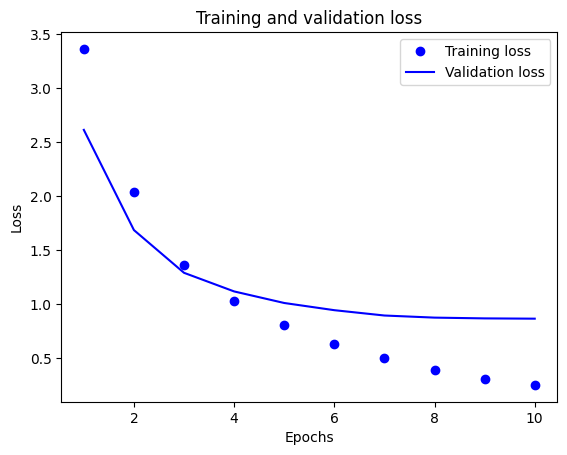

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

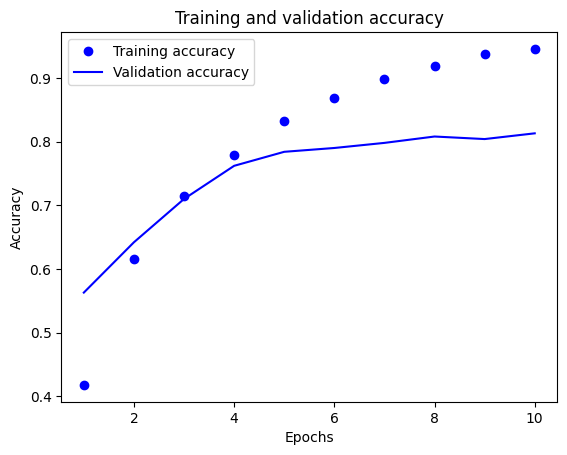

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## 4. Generating predictions on new data

Once the model is trained, we can use it to make predictions on new, unseen data (the test set). The output of the model will be a probability distribution over the classes. We can get the predicted class by taking the index with the highest probability.

In [ ]:
predictions = model.predict(x_test)

# Get the predicted class for the first test sample
predicted_class = np.argmax(predictions[0])
true_class = np.argmax(y_test[0])

print(f"Predicted class for the first test sample: {predicted_class}")
print(f"True class for the first test sample: {true_class}")

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Predicted class for the first test sample: 3
True class for the first test sample: 3


## 5. A different way to handle the labels and the loss

Instead of one-hot encoding the labels and using categorical crossentropy, we could use integer labels and the `sparse_categorical_crossentropy` loss function. This is mathematically equivalent but can be more convenient when the number of classes is large.

In [ ]:
# Using integer labels
train_labels_int = train_labels
test_labels_int = test_labels

model_sparse = models.Sequential()
model_sparse.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model_sparse.add(layers.Dense(64, activation='relu'))
model_sparse.add(layers.Dense(46, activation='softmax'))

model_sparse.compile(optimizer='adam',
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

history_sparse = model_sparse.fit(x_train,
                                  train_labels_int,
                                  epochs=10,
                                  batch_size=512,
                                  validation_split=0.1) # Using validation_split

Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.2929 - loss: 3.5461 - val_accuracy: 0.5640 - val_loss: 2.5678
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.6095 - loss: 2.1697 - val_accuracy: 0.6541 - val_loss: 1.7499
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.7125 - loss: 1.4001 - val_accuracy: 0.7219 - val_loss: 1.4174
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.7865 - loss: 1.0451 - val_accuracy: 0.7364 - val_loss: 1.2511
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.8299 - loss: 0.8249 - val_accuracy: 0.7653 - val_loss: 1.1511
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - accuracy: 0.8680 - loss: 0.6544 - val_accuracy: 0.7798 - val_loss: 1.0803
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - accuracy: 0.9009 - loss: 0.4870 - val_accuracy: 0.7864 - val_loss: 1.0325
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.9236 - loss: 0.3922 - val_accuracy: 0.7964 - v

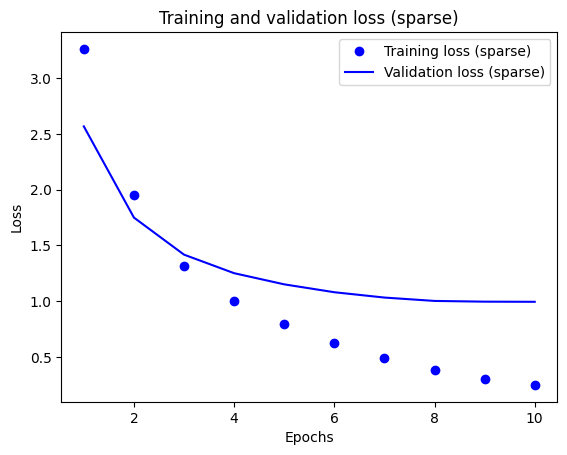

In [ ]:
import matplotlib.pyplot as plt

loss_sparse = history_sparse.history['loss']
val_loss_sparse = history_sparse.history['val_loss']

epochs_sparse = range(1, len(loss_sparse) + 1)

plt.plot(epochs_sparse, loss_sparse, 'bo', label='Training loss (sparse)')
plt.plot(epochs_sparse, val_loss_sparse, 'b', label='Validation loss (sparse)')
plt.title('Training and validation loss (sparse)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

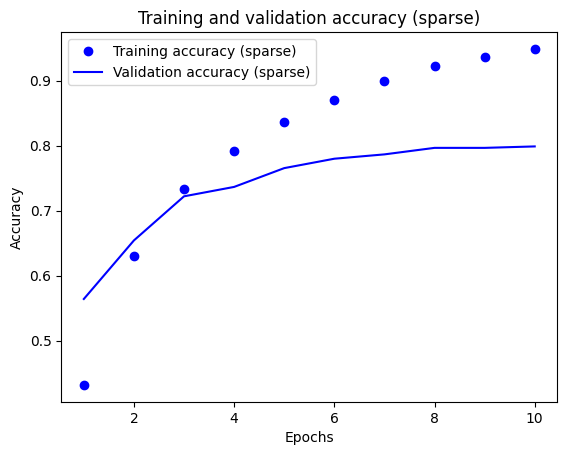

In [ ]:
acc_sparse = history_sparse.history['accuracy']
val_acc_sparse = history_sparse.history['val_accuracy']

plt.plot(epochs_sparse, acc_sparse, 'bo', label='Training accuracy (sparse)')
plt.plot(epochs_sparse, val_acc_sparse, 'b', label='Validation accuracy (sparse)')
plt.title('Training and validation accuracy (sparse)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
predictions_sparse = model_sparse.predict(x_test)

# Get the predicted class for the first test sample
predicted_class_sparse = np.argmax(predictions_sparse[0])
true_class_sparse = test_labels_int[0]

print(f"Predicted class for the first test sample (sparse): {predicted_class_sparse}")
print(f"True class for the first test sample (sparse): {true_class_sparse}")

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Predicted class for the first test sample (sparse): 3
True class for the first test sample (sparse): 3


## 6. The importance of having sufficiently large intermediate layers

The size of the intermediate layers is crucial. If they are too small, they can act as an "information bottleneck," meaning they cannot hold enough information to distinguish between the different classes. This can lead to lower accuracy.

Consider a layer with $N$ input units and $M$ output units. If $M$ is significantly smaller than $N$, the layer is forced to compress the information from $N$ dimensions into $M$ dimensions, potentially losing valuable information.

In our case, with 46 output classes, it's important that the intermediate layers are large enough to learn meaningful representations of the data that can differentiate between these classes. Using layers with 64 units seems reasonable for this dataset.

## Summary and Conclusion

In this notebook, we explored the process of classifying newswires using a deep learning model. We covered:

*   **Data Preparation**: Loading and vectorizing the Reuters dataset, and splitting it into training, validation, and test sets.
*   **Model Building**: Constructing a neural network with Dense layers and ReLU activation, and a final Dense layer with Softmax activation for multiclass classification.
*   **Validation**: Splitting the training data for validation and monitoring loss and accuracy during training to prevent overfitting. We used categorical crossentropy as the loss function.
*   **Prediction**: Generating predictions on new data using the trained model and interpreting the probability distribution output.
*   **Alternative Approach**: Demonstrating the use of integer labels and `sparse_categorical_crossentropy` as an alternative to one-hot encoding and categorical crossentropy.
*   **Layer Size Importance**: Discussing the significance of having sufficiently large intermediate layers to avoid information bottlenecks.

The models trained showed reasonable accuracy on the validation set, indicating their ability to classify newswires into the 46 different categories. The plots of training and validation loss and accuracy helped visualize the training progress and identify potential overfitting.

This example provides a solid foundation for approaching multiclass text classification problems using deep learning with Keras. Further improvements could involve experimenting with different network architectures, hyperparameters, or incorporating more advanced text preprocessing techniques.